# Research the relation between "Audience Size/Budget" with "CPM/Click" 

# 1.Preprocessing
* Import necessary package and read file

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from IPython.core.display import HTML
from sklearn.preprocessing import MinMaxScaler

# df = pd.read_csv('./0_df_Final_0802-0902.csv',sep = ',')
df = pd.read_csv('./0_df_Final_0802-0902.csv')
df.tail(5)


,adsetID_date,Campaign_ID,Adset_ID,Adset_Name,IT_ID1,IT_ID2,IT_ID3,date,day_ctr,day_clicks,day_reach,day_spend,day_actions,day_impression,IT_Aud_ID1_up_bound,IT_Aud_ID2_up_bound,IT_Aud_ID3_up_bound
763,23851883812620227_2022-08-29,23851882559020227,23851883812620227,居家生活_0808,6002920953955,6003132926214,6003234413249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574430420,614046470,394840382
764,23851883812620227_2022-08-30,23851882559020227,23851883812620227,居家生活_0808,6002920953955,6003132926214,6003234413249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574430420,614046470,394840382
765,23851883812620227_2022-08-31,23851882559020227,23851883812620227,居家生活_0808,6002920953955,6003132926214,6003234413249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574430420,614046470,394840382
766,23851883812620227_2022-09-01,23851882559020227,23851883812620227,居家生活_0808,6002920953955,6003132926214,6003234413249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574430420,614046470,394840382
767,23851883812620227_2022-09-02,23851882559020227,23851883812620227,居家生活_0808,6002920953955,6003132926214,6003234413249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574430420,614046470,394840382


### Research/Observe Data :

In [2]:
df.describe()  # 觀察 day_spend 的統計資料

,Campaign_ID,Adset_ID,IT_ID1,IT_ID2,IT_ID3,day_ctr,day_clicks,day_reach,day_spend,day_actions,day_impression,IT_Aud_ID1_up_bound,IT_Aud_ID2_up_bound,IT_Aud_ID3_up_bound
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.385188e+16,2.385199e+16,6.003244e+12,6.003381e+12,6.003471e+12,0.953826,25.184466,2000.514563,803.436893,7.407767,2440.087379,1.568999e+08,1.884367e+08,1.420093e+08
std,3.442242e+02,7.586758e+10,2.168767e+08,2.113218e+08,2.387397e+08,0.568936,33.186859,2164.467302,925.010341,13.568589,2780.457058,2.664168e+08,2.214564e+08,1.632817e+08
min,2.385188e+16,2.385188e+16,6.002840e+12,6.002867e+12,6.002868e+12,0.000000,0.000000,17.000000,0.000000,1.000000,17.000000,1.387800e+05,6.713760e+06,1.551710e+06
25%,2.385188e+16,2.385193e+16,6.003120e+12,6.003240e+12,6.003365e+12,0.583507,3.000000,433.000000,136.500000,1.000000,465.000000,1.768012e+07,3.283214e+07,1.692988e+07
50%,2.385188e+16,2.385199e+16,6.003256e+12,6.003452e+12,6.003519e+12,0.987492,12.000000,1044.000000,404.000000,3.000000,1128.000000,5.902864e+07,9.150083e+07,6.703291e+07
75%,2.385188e+16,2.385205e+16,6.003454e+12,6.003541e+12,6.003645e+12,1.282077,38.000000,3158.500000,1238.500000,6.000000,3897.000000,1.223800e+08,2.459553e+08,1.880793e+08
max,2.385188e+16,2.385213e+16,6.003606e+12,6.003739e+12,6.003979e+12,3.125000,198.000000,11032.000000,4806.000000,99.000000,14463.000000,1.122220e+09,7.059934e+08,5.479500e+08


In [3]:
print("* Data length : ",len(df))
print("* Describe :\n",df.day_spend.describe())  # 觀察 day_spend 的統計資料
print("")
print("* keys : ",df.keys())

print("* Info :")
print(df.info())
display(df)


* Data length :  768
* Describe :
 count     103.000000
mean      803.436893
std       925.010341
min         0.000000
25%       136.500000
50%       404.000000
75%      1238.500000
max      4806.000000
Name: day_spend, dtype: float64

* keys :  Index(['adsetID_date', 'Campaign_ID', 'Adset_ID', 'Adset_Name', 'IT_ID1',
       'IT_ID2', 'IT_ID3', 'date', 'day_ctr', 'day_clicks', 'day_reach',
       'day_spend', 'day_actions', 'day_impression', 'IT_Aud_ID1_up_bound',
       'IT_Aud_ID2_up_bound', 'IT_Aud_ID3_up_bound'],
      dtype='object')
* Info :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   adsetID_date         768 non-null    object 
 1   Campaign_ID          768 non-null    int64  
 2   Adset_ID             768 non-null    int64  
 3   Adset_Name           768 non-null    object 
 4   IT_ID1               768 non-null   

,adsetID_date,Campaign_ID,Adset_ID,Adset_Name,IT_ID1,IT_ID2,IT_ID3,date,day_ctr,day_clicks,day_reach,day_spend,day_actions,day_impression,IT_Aud_ID1_up_bound,IT_Aud_ID2_up_bound,IT_Aud_ID3_up_bound
0,23852132429420227_2022-08-02,23851882559020227,23852132429420227,AI_DB_20220831_Washingmachine_Waste_Probiotic,6003512286842,6003567925503,6003655135020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35030670,38333490,112428890
1,23852132429420227_2022-08-03,23851882559020227,23852132429420227,AI_DB_20220831_Washingmachine_Waste_Probiotic,6003512286842,6003567925503,6003655135020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35030670,38333490,112428890
2,23852132429420227_2022-08-04,23851882559020227,23852132429420227,AI_DB_20220831_Washingmachine_Waste_Probiotic,6003512286842,6003567925503,6003655135020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35030670,38333490,112428890
3,23852132429420227_2022-08-05,23851882559020227,23852132429420227,AI_DB_20220831_Washingmachine_Waste_Probiotic,6003512286842,6003567925503,6003655135020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35030670,38333490,112428890
4,23852132429420227_2022-08-06,23851882559020227,23852132429420227,AI_DB_20220831_Washingmachine_Waste_Probiotic,6003512286842,6003567925503,6003655135020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35030670,38333490,112428890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,23851883812620227_2022-08-29,23851882559020227,23851883812620227,居家生活_0808,6002920953955,6003132926214,6003234413249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574430420,614046470,394840382
764,23851883812620227_2022-08-30,23851882559020227,23851883812620227,居家生活_0808,6002920953955,6003132926214,6003234413249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574430420,614046470,394840382
765,23851883812620227_2022-08-31,23851882559020227,23851883812620227,居家生活_0808,6002920953955,6003132926214,6003234413249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574430420,614046470,394840382
766,23851883812620227_2022-09-01,23851882559020227,23851883812620227,居家生活_0808,6002920953955,6003132926214,6003234413249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574430420,614046470,394840382


### Dataset Information :
- adsetID_date : 利用Adset ID 與日期創造出的獨立Key
- Campaign_ID : 活動編號(ID)
- Adset_ID : 廣告組合編號(ID)
- Adset_Name : 廣告名稱
- IT_ID1 : 興趣受眾1-ID
- IT_ID2 : 興趣受眾2-ID
- IT_ID3 : 興趣受眾3-ID
- date : 日期(年/月/日)
- day_ctr(click through rate) : 每日點擊率
- day_clicks : 每日點擊數
- day_reach : 每日觸及人數(扣除重複Impression(曝光)對象)
- day_spend	: 每日花費
- day_actions : 每日轉換數
- day_impression : 每日曝光數
- IT_Aud_ID1_up_bound : 興趣受眾1-預估人數上限
- IT_Aud_ID2_up_bound : 興趣受眾2-預估人數上限
- IT_Aud_ID3_up_bound : 興趣受眾3-預估人數上限

# 2.EDA

In [4]:
# 1.Select not-NaN data
print("< df_all isna : >\n",df.isna().sum()) # 確認 perday方面資料有哪些沒有值
df=df.sort_values(by=['day_ctr','day_clicks']).copy()
df_all = df[df['date'].notna()] # Select the "not NAN" data
print("")
print("< df_Perday isna: >\n",df_all.isna().sum())
# df_all.to_csv('0_df_Perday.csv')

# 2.Remove duplicate(No Need in this case)
only_one=df_all.adsetID_date.value_counts()[df_all.adsetID_date.value_counts()==1].keys()
only_one

display(df_all)

< df_all isna : >
 adsetID_date             0
Campaign_ID              0
Adset_ID                 0
Adset_Name               0
IT_ID1                   0
IT_ID2                   0
IT_ID3                   0
date                   665
day_ctr                665
day_clicks             665
day_reach              665
day_spend              665
day_actions            665
day_impression         665
IT_Aud_ID1_up_bound      0
IT_Aud_ID2_up_bound      0
IT_Aud_ID3_up_bound      0
dtype: int64

< df_Perday isna: >
 adsetID_date           0
Campaign_ID            0
Adset_ID               0
Adset_Name             0
IT_ID1                 0
IT_ID2                 0
IT_ID3                 0
date                   0
day_ctr                0
day_clicks             0
day_reach              0
day_spend              0
day_actions            0
day_impression         0
IT_Aud_ID1_up_bound    0
IT_Aud_ID2_up_bound    0
IT_Aud_ID3_up_bound    0
dtype: int64


,adsetID_date,Campaign_ID,Adset_ID,Adset_Name,IT_ID1,IT_ID2,IT_ID3,date,day_ctr,day_clicks,day_reach,day_spend,day_actions,day_impression,IT_Aud_ID1_up_bound,IT_Aud_ID2_up_bound,IT_Aud_ID3_up_bound
250,23852032646620227_2022-08-28,23851882559020227,23852032646620227,AI_20220823_SudaMotor_Dodge_Richcar,6003169755036,6003739380153,6003979333948,2022-08-28,0.000000,0.0,63.0,12.0,9.0,63.0,31301400,34880030,30735900
276,23852021854480227_2022-08-22,23851882559020227,23852021854480227,AI_20220822_HyundaiMotor_Lotuscar_Jaguarcar,6003218688558,6003257743569,6003496694880,2022-08-22,0.000000,0.0,222.0,60.0,29.0,236.0,64630310,55380530,43939280
493,23851947328850227_2022-08-15,23851882559020227,23851947328850227,AI_20220815_electriccar_Kia_AutomotiveDesign,6003103779434,6003166714830,6003641420907,2022-08-15,0.000000,0.0,83.0,5.0,14.0,87.0,106781360,98117820,92179040
555,23851930679280227_2022-08-13,23851882559020227,23851930679280227,AI_20220813_Toyotacars_Fox_Ford,6003144341584,6003481743064,6003667359704,2022-08-13,0.000000,0.0,17.0,0.0,5.0,17.0,154409640,284874330,150086350
622,23851919972150227_2022-08-16,23851882559020227,23851919972150227,AI_20220812_Shares FiscalandFinance _Automobil...,6003157909075,6003304550260,6003381642074,2022-08-16,0.000000,0.0,79.0,23.0,13.0,83.0,307050980,454837290,33622580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,23852032646620227_2022-08-24,23851882559020227,23852032646620227,AI_20220823_SudaMotor_Dodge_Richcar,6003169755036,6003739380153,6003979333948,2022-08-24,1.937567,18.0,737.0,270.0,6.0,929.0,31301400,34880030,30735900
308,23852014570330227_2022-08-22,23851882559020227,23852014570330227,AI_NLP_20220821_market_compete_database,6003232986285,6003393771563,6003496889025,2022-08-22,1.960784,1.0,43.0,6.0,6.0,51.0,28024340,232982280,214515660
678,23851883875320227_2022-08-08,23851882559020227,23851883875320227,購物時尚_0808,6002839660079,6003188355978,6003198476967,2022-08-08,2.145923,5.0,227.0,159.0,3.0,233.0,1122219840,674294881,486104143
745,23851883812620227_2022-08-11,23851882559020227,23851883812620227,居家生活_0808,6002920953955,6003132926214,6003234413249,2022-08-11,2.162162,4.0,183.0,50.0,3.0,185.0,574430420,614046470,394840382


### Plot Per-Day Spent Size Distribution : 

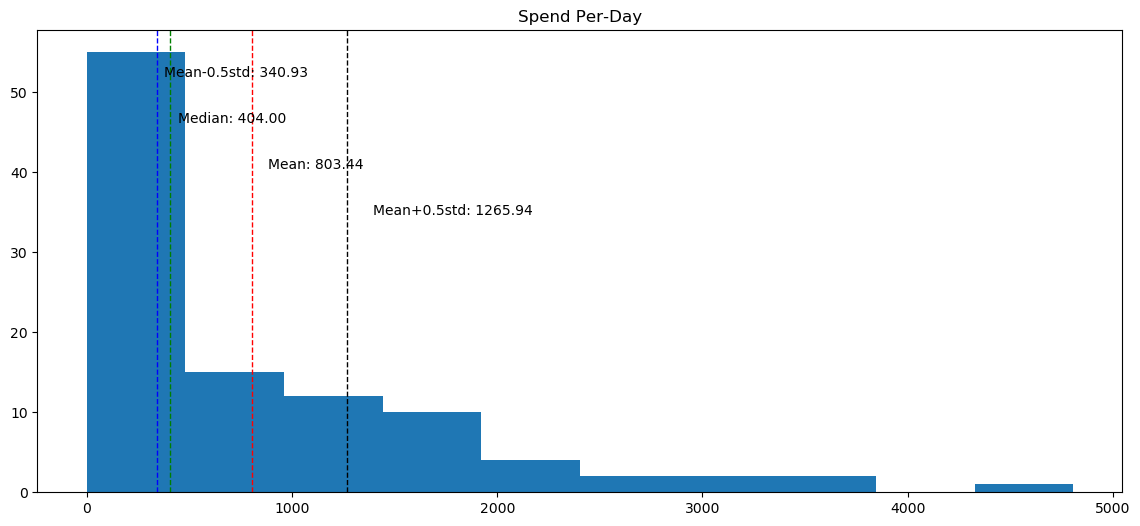

In [5]:
plt.figure(figsize=(14, 6))
plt.hist(df_all.day_spend, bins=10)
plt.title("Spend Per-Day")

mean=df_all.day_spend.mean()
median=df_all.day_spend.median()
std=df_all.day_spend.std()
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)
plt.axvline(median, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean+0.5*std, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean-0.5*std, color='blue', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(mean*1.1, max_ylim*0.7, 'Mean: {:.2f}'.format(mean))
plt.text(median*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(median))
plt.text((mean+0.5*std)*1.1, max_ylim*0.6, 'Mean+0.5std: {:.2f}'.format(mean+0.5*std))
plt.text((mean-0.5*std)*1.1, max_ylim*0.9, 'Mean-0.5std: {:.2f}'.format(mean-0.5*std))

plt.show()

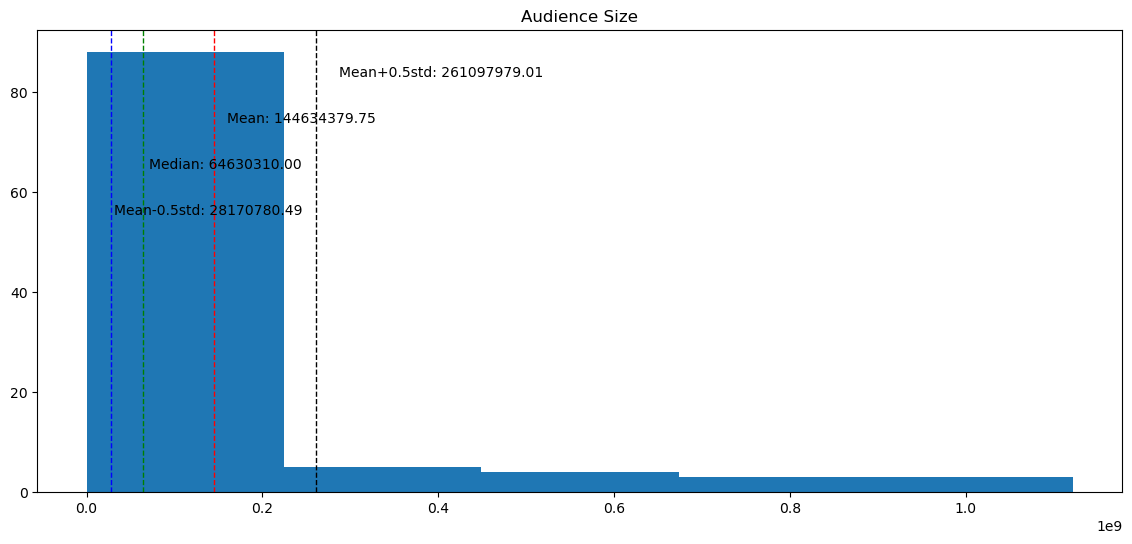

In [6]:
plt.figure(figsize=(14, 6))
plt.hist(df_all.IT_Aud_ID1_up_bound, bins=5)
plt.title("Audience Size")

mean=df_all.IT_Aud_ID1_up_bound.mean()
median=df_all.IT_Aud_ID1_up_bound.median()
std=df_all.IT_Aud_ID1_up_bound.std()
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)
plt.axvline(median, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean+0.5*std, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean-0.5*std, color='blue', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(mean*1.1, max_ylim*0.8, 'Mean: {:.2f}'.format(mean))
plt.text(median*1.1, max_ylim*0.7, 'Median: {:.2f}'.format(median))
plt.text((mean+0.5*std)*1.1, max_ylim*0.9, 'Mean+0.5std: {:.2f}'.format(mean+0.5*std))
plt.text((mean-0.5*std)*1.1, max_ylim*0.6, 'Mean-0.5std: {:.2f}'.format(mean-0.5*std))

plt.show()
# df_all.head()

### Plot per-day data 

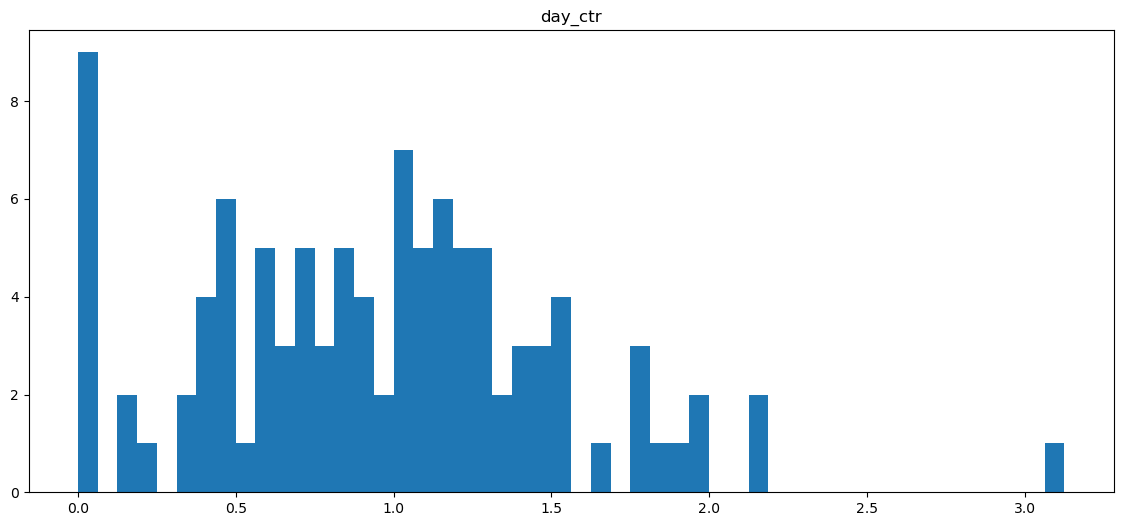

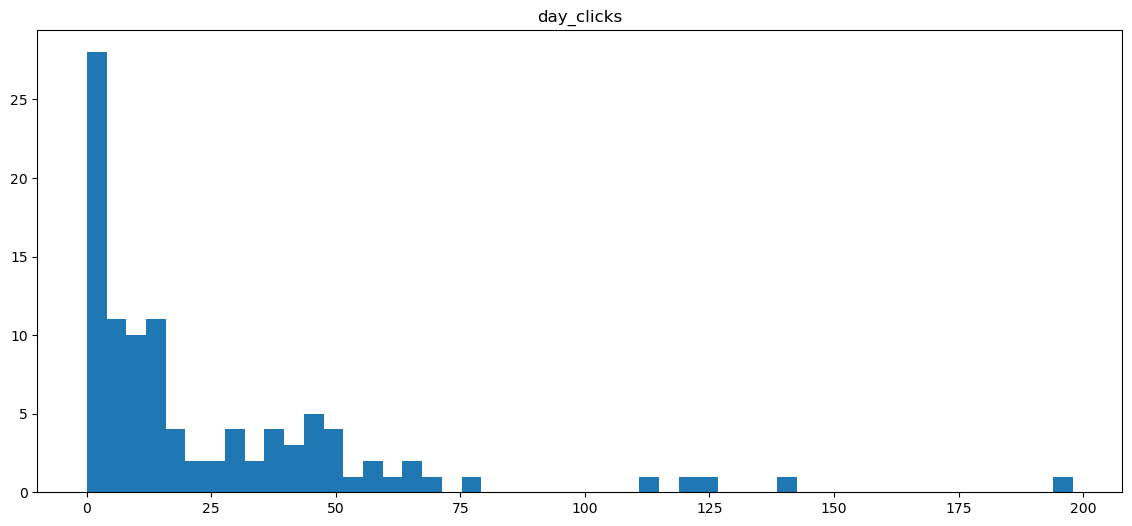

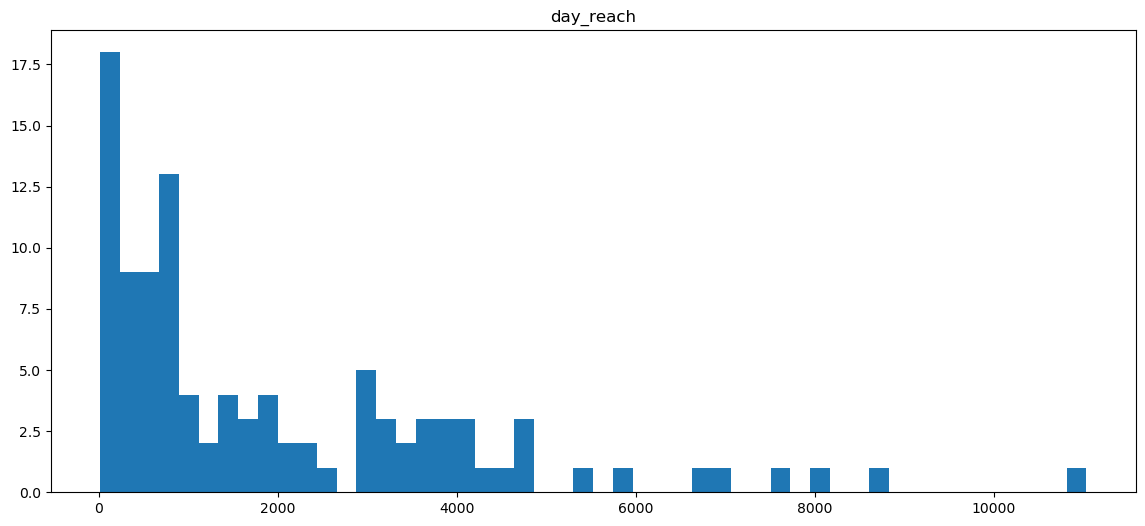

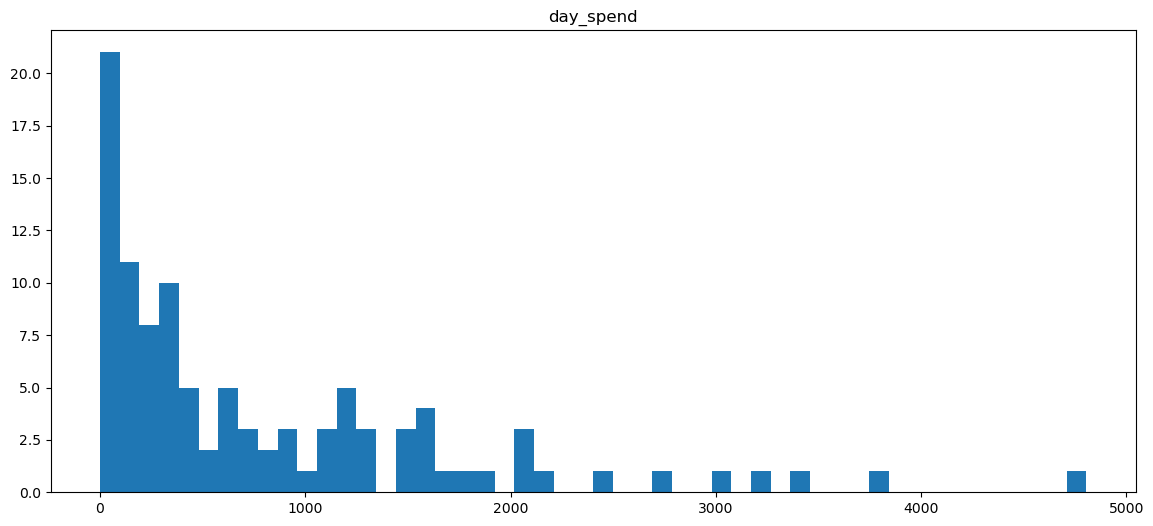

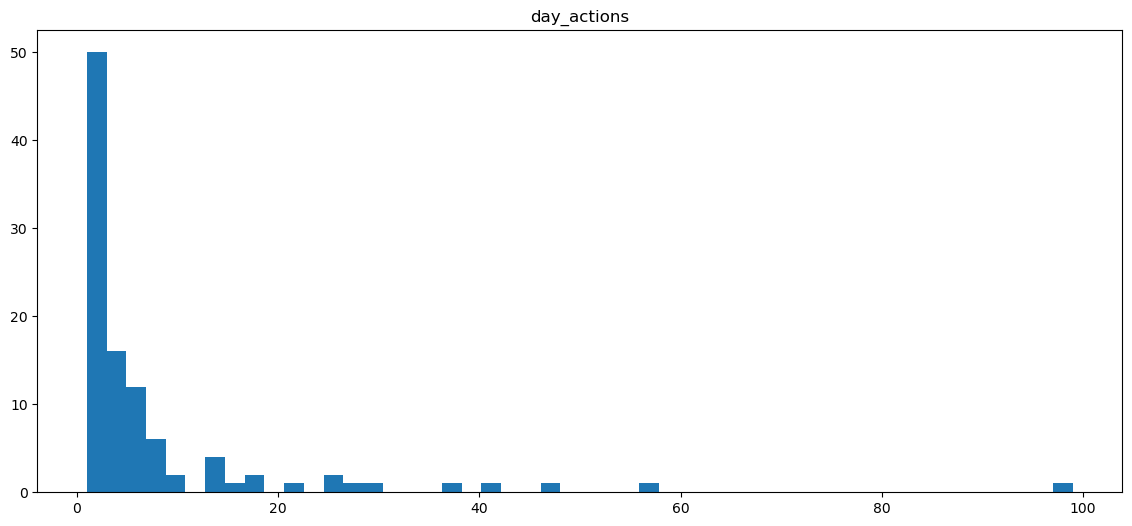

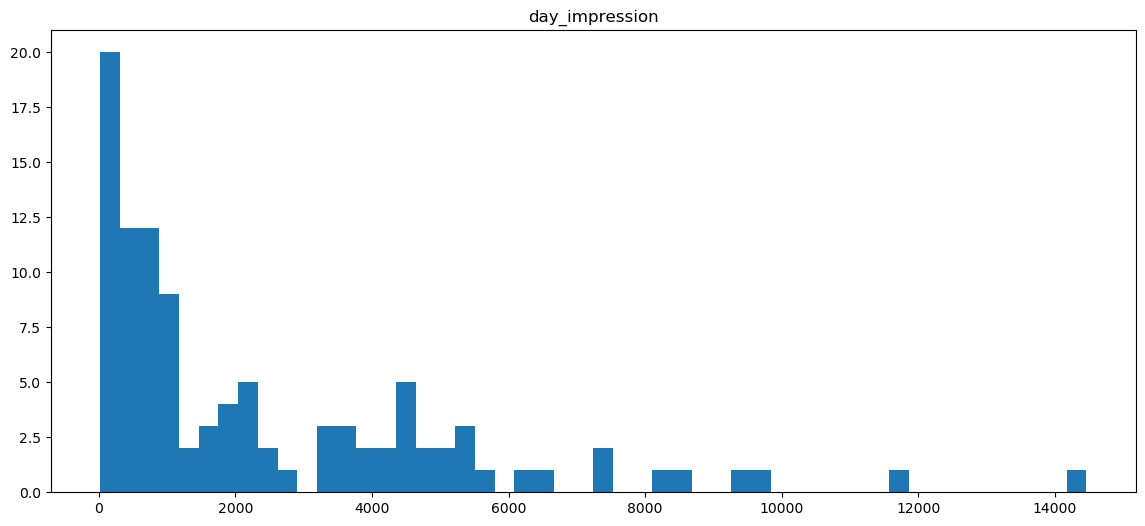

In [7]:
perday = df_all.keys()
lst_perday=[i for i in perday if "day" in i]
# print(lst_perday)

for i in lst_perday :
    dat=df_all[i].dropna()
    #print("dat : \n",dat)
    plt.figure(figsize=(14, 6))
    plt.hist(dat, bins=50)
    plt.title(i)
    plt.show()

# 3.Feature Engineering

### Create CPM 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


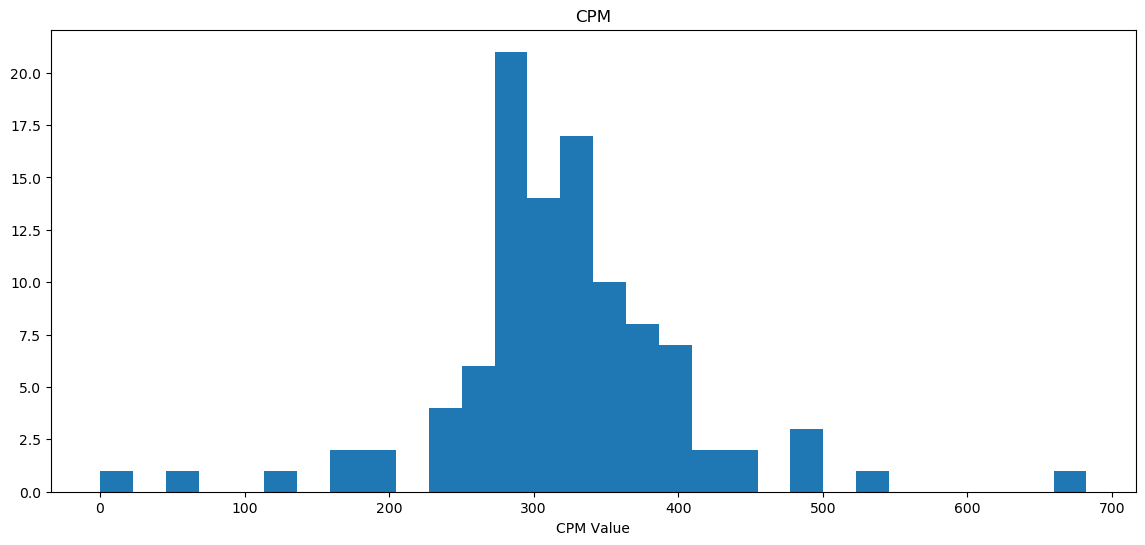

In [8]:
day_spend = df_all.day_spend
day_impression = df_all.day_impression
CPM = (day_spend/day_impression)*1000
# print(cpm)
df_CPM = pd.DataFrame(CPM)
# display(df_CPM)

# 將新建的CPM data加入df_Perday
df_all['CPM'] = df_CPM 
plt.figure(figsize=(14, 6))
plt.hist(df_all['CPM'], bins=30)
plt.title('CPM')
plt.xlabel('CPM Value')
plt.show()

# 檢查'CPM'是否已加入-完整data(df_all)
# display(df_all) 

### Campaign_Daily_Budget(加入campaign 預算進入dataframe)

In [9]:
df_all['Campaign_Daily_Budget'] = df_all.IT_Aud_ID3_up_bound
df_all['Campaign_Daily_Budget'] = "3400"
df_all

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,adsetID_date,Campaign_ID,Adset_ID,Adset_Name,IT_ID1,IT_ID2,IT_ID3,date,day_ctr,day_clicks,day_reach,day_spend,day_actions,day_impression,IT_Aud_ID1_up_bound,IT_Aud_ID2_up_bound,IT_Aud_ID3_up_bound,CPM,Campaign_Daily_Budget
250,23852032646620227_2022-08-28,23851882559020227,23852032646620227,AI_20220823_SudaMotor_Dodge_Richcar,6003169755036,6003739380153,6003979333948,2022-08-28,0.000000,0.0,63.0,12.0,9.0,63.0,31301400,34880030,30735900,190.476190,3400
276,23852021854480227_2022-08-22,23851882559020227,23852021854480227,AI_20220822_HyundaiMotor_Lotuscar_Jaguarcar,6003218688558,6003257743569,6003496694880,2022-08-22,0.000000,0.0,222.0,60.0,29.0,236.0,64630310,55380530,43939280,254.237288,3400
493,23851947328850227_2022-08-15,23851882559020227,23851947328850227,AI_20220815_electriccar_Kia_AutomotiveDesign,6003103779434,6003166714830,6003641420907,2022-08-15,0.000000,0.0,83.0,5.0,14.0,87.0,106781360,98117820,92179040,57.471264,3400
555,23851930679280227_2022-08-13,23851882559020227,23851930679280227,AI_20220813_Toyotacars_Fox_Ford,6003144341584,6003481743064,6003667359704,2022-08-13,0.000000,0.0,17.0,0.0,5.0,17.0,154409640,284874330,150086350,0.000000,3400
622,23851919972150227_2022-08-16,23851882559020227,23851919972150227,AI_20220812_Shares FiscalandFinance _Automobil...,6003157909075,6003304550260,6003381642074,2022-08-16,0.000000,0.0,79.0,23.0,13.0,83.0,307050980,454837290,33622580,277.108434,3400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,23852032646620227_2022-08-24,23851882559020227,23852032646620227,AI_20220823_SudaMotor_Dodge_Richcar,6003169755036,6003739380153,6003979333948,2022-08-24,1.937567,18.0,737.0,270.0,6.0,929.0,31301400,34880030,30735900,290.635091,3400
308,23852014570330227_2022-08-22,23851882559020227,23852014570330227,AI_NLP_20220821_market_compete_database,6003232986285,6003393771563,6003496889025,2022-08-22,1.960784,1.0,43.0,6.0,6.0,51.0,28024340,232982280,214515660,117.647059,3400
678,23851883875320227_2022-08-08,23851882559020227,23851883875320227,購物時尚_0808,6002839660079,6003188355978,6003198476967,2022-08-08,2.145923,5.0,227.0,159.0,3.0,233.0,1122219840,674294881,486104143,682.403433,3400
745,23851883812620227_2022-08-11,23851882559020227,23851883812620227,居家生活_0808,6002920953955,6003132926214,6003234413249,2022-08-11,2.162162,4.0,183.0,50.0,3.0,185.0,574430420,614046470,394840382,270.270270,3400


### New Dataset Information :
- CPM : 使用Impression與Spend 新增CPM參數
- Sum_of_IT_Aud_Size : 廣告受眾size summation
- Campaign_Daily_Budget : 此 campaign budget

### 建立最大受眾feature(取三種興趣受眾中最大值作為最終受眾數量的選擇)

In [10]:
IT1 = df_all.IT_Aud_ID1_up_bound
IT2 = df_all.IT_Aud_ID2_up_bound
IT3 = df_all.IT_Aud_ID3_up_bound
Concat = pd.concat([IT1,IT2,IT3],axis=1)
Concat['max'] = Concat.idxmax(axis=1)
df_all['max_IT_Aud'] = Concat.max(axis=1)
df_all.drop(['IT_Aud_ID1_up_bound','IT_Aud_ID2_up_bound','IT_Aud_ID3_up_bound'], axis=1, inplace=True)
df_all

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,adsetID_date,Campaign_ID,Adset_ID,Adset_Name,IT_ID1,IT_ID2,IT_ID3,date,day_ctr,day_clicks,day_reach,day_spend,day_actions,day_impression,CPM,Campaign_Daily_Budget,max_IT_Aud
250,23852032646620227_2022-08-28,23851882559020227,23852032646620227,AI_20220823_SudaMotor_Dodge_Richcar,6003169755036,6003739380153,6003979333948,2022-08-28,0.000000,0.0,63.0,12.0,9.0,63.0,190.476190,3400,34880030
276,23852021854480227_2022-08-22,23851882559020227,23852021854480227,AI_20220822_HyundaiMotor_Lotuscar_Jaguarcar,6003218688558,6003257743569,6003496694880,2022-08-22,0.000000,0.0,222.0,60.0,29.0,236.0,254.237288,3400,64630310
493,23851947328850227_2022-08-15,23851882559020227,23851947328850227,AI_20220815_electriccar_Kia_AutomotiveDesign,6003103779434,6003166714830,6003641420907,2022-08-15,0.000000,0.0,83.0,5.0,14.0,87.0,57.471264,3400,106781360
555,23851930679280227_2022-08-13,23851882559020227,23851930679280227,AI_20220813_Toyotacars_Fox_Ford,6003144341584,6003481743064,6003667359704,2022-08-13,0.000000,0.0,17.0,0.0,5.0,17.0,0.000000,3400,284874330
622,23851919972150227_2022-08-16,23851882559020227,23851919972150227,AI_20220812_Shares FiscalandFinance _Automobil...,6003157909075,6003304550260,6003381642074,2022-08-16,0.000000,0.0,79.0,23.0,13.0,83.0,277.108434,3400,454837290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,23852032646620227_2022-08-24,23851882559020227,23852032646620227,AI_20220823_SudaMotor_Dodge_Richcar,6003169755036,6003739380153,6003979333948,2022-08-24,1.937567,18.0,737.0,270.0,6.0,929.0,290.635091,3400,34880030
308,23852014570330227_2022-08-22,23851882559020227,23852014570330227,AI_NLP_20220821_market_compete_database,6003232986285,6003393771563,6003496889025,2022-08-22,1.960784,1.0,43.0,6.0,6.0,51.0,117.647059,3400,232982280
678,23851883875320227_2022-08-08,23851882559020227,23851883875320227,購物時尚_0808,6002839660079,6003188355978,6003198476967,2022-08-08,2.145923,5.0,227.0,159.0,3.0,233.0,682.403433,3400,1122219840
745,23851883812620227_2022-08-11,23851882559020227,23851883812620227,居家生活_0808,6002920953955,6003132926214,6003234413249,2022-08-11,2.162162,4.0,183.0,50.0,3.0,185.0,270.270270,3400,614046470


### 整理資料 : Drop Unneccessary data(使dataframe更簡潔)

In [11]:
df_all.drop(['Adset_ID','IT_ID1','IT_ID2','IT_ID3','Campaign_ID','day_ctr','day_actions'], axis=1, inplace=True)
# 也可用 del (ex : $del df['column_name'])

#(!) display whole dataframe 
display(HTML(df_all.to_html()))

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,adsetID_date,Adset_Name,date,day_clicks,day_reach,day_spend,day_impression,CPM,Campaign_Daily_Budget,max_IT_Aud
250,23852032646620227_2022-08-28,AI_20220823_SudaMotor_Dodge_Richcar,2022-08-28,0.0,63.0,12.0,63.0,190.476190,3400,34880030
276,23852021854480227_2022-08-22,AI_20220822_HyundaiMotor_Lotuscar_Jaguarcar,2022-08-22,0.0,222.0,60.0,236.0,254.237288,3400,64630310
493,23851947328850227_2022-08-15,AI_20220815_electriccar_Kia_AutomotiveDesign,2022-08-15,0.0,83.0,5.0,87.0,57.471264,3400,106781360
555,23851930679280227_2022-08-13,AI_20220813_Toyotacars_Fox_Ford,2022-08-13,0.0,17.0,0.0,17.0,0.000000,3400,284874330
622,23851919972150227_2022-08-16,AI_20220812_Shares FiscalandFinance _Automobileindustry_Carchiefmobilization,2022-08-16,0.0,79.0,23.0,83.0,277.108434,3400,454837290
680,23851883875320227_2022-08-10,購物時尚_0808,2022-08-10,0.0,184.0,73.0,187.0,390.374332,3400,1122219840
710,23851883844500227_2022-08-08,金融保險房車_0808,2022-08-08,0.0,214.0,82.0,214.0,383.177570,3400,492194130
711,23851883844500227_2022-08-09,金融保險房車_0808,2022-08-09,0.0,266.0,83.0,281.0,295.373665,3400,492194130
742,23851883812620227_2022-08-08,居家生活_0808,2022-08-08,0.0,117.0,48.0,118.0,406.779661,3400,614046470
402,23851981481560227_2022-08-20,AI_DB_20220818_MortalKombat 2011videogame _PCgame_FrankSinatra,2022-08-20,1.0,650.0,216.0,695.0,310.791367,3400,61304340


### (最終決定不使用此Feature) Sum of Audience Size : 

In [12]:
# ID1_ize = df_all.IT_Aud_ID1_up_bound
# ID2_ize = df_all.IT_Aud_ID2_up_bound
# ID3_ize = df_all.IT_Aud_ID3_up_bound
# sum_of_IT_Aud_Size = ID1_ize+ID2_ize+ID3_ize
# # print(sum_of_IT_Aud_Size)

# df_all['sum_of_IT_Aud_Size'] = sum_of_IT_Aud_Size
# plt.figure(figsize=(14, 6))
# plt.hist(df_all['sum_of_IT_Aud_Size'], bins=30)
# plt.title('sum_of_IT_Aud_Size')
# plt.xlabel('IT_Aud_Size')
# plt.ylabel('Frequency')
# plt.show()
# display(df_all)

### (隨時可使用)Remove Outlier

In [13]:
# remove_outlier_spend = df_day_spend[(np.abs(stats.zscore(df_day_spend)) < 3).all(axis=1)]
# remove_outlier_spend.describe()

# remove_outlier_imp = df_day_impression[(np.abs(stats.zscore(df_day_impression)) < 3).all(axis=1)]
# remove_outlier_imp.describe()

#  4.Normalization/ Feature Scaling

In [14]:
scaler = MinMaxScaler()

max_IT_Aud = df_all.max_IT_Aud
CPM = df_all.CPM

df_max_IT_Aud = pd.DataFrame(max_IT_Aud)  # MinMaxScaler
df_CPM = pd.DataFrame(CPM)

df_max_IT_Aud['max_IT_Aud'] = scaler.fit_transform(df_max_IT_Aud[['max_IT_Aud']])
df_CPM['CPM'] = scaler.fit_transform(df_CPM[['CPM']])

df_all["max_IT_Aud_norm"] = df_max_IT_Aud['max_IT_Aud']
df_all["CPM_norm"] = df_CPM['CPM']
df_all

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,adsetID_date,Adset_Name,date,day_clicks,day_reach,day_spend,day_impression,CPM,Campaign_Daily_Budget,max_IT_Aud,max_IT_Aud_norm,CPM_norm
250,23852032646620227_2022-08-28,AI_20220823_SudaMotor_Dodge_Richcar,2022-08-28,0.0,63.0,12.0,63.0,190.476190,3400,34880030,0.024852,0.279125
276,23852021854480227_2022-08-22,AI_20220822_HyundaiMotor_Lotuscar_Jaguarcar,2022-08-22,0.0,222.0,60.0,236.0,254.237288,3400,64630310,0.051533,0.372562
493,23851947328850227_2022-08-15,AI_20220815_electriccar_Kia_AutomotiveDesign,2022-08-15,0.0,83.0,5.0,87.0,57.471264,3400,106781360,0.089335,0.084219
555,23851930679280227_2022-08-13,AI_20220813_Toyotacars_Fox_Ford,2022-08-13,0.0,17.0,0.0,17.0,0.000000,3400,284874330,0.249052,0.000000
622,23851919972150227_2022-08-16,AI_20220812_Shares FiscalandFinance _Automobil...,2022-08-16,0.0,79.0,23.0,83.0,277.108434,3400,454837290,0.401478,0.406077
...,...,...,...,...,...,...,...,...,...,...,...,...
246,23852032646620227_2022-08-24,AI_20220823_SudaMotor_Dodge_Richcar,2022-08-24,18.0,737.0,270.0,929.0,290.635091,3400,34880030,0.024852,0.425899
308,23852014570330227_2022-08-22,AI_NLP_20220821_market_compete_database,2022-08-22,1.0,43.0,6.0,51.0,117.647059,3400,232982280,0.202514,0.172401
678,23851883875320227_2022-08-08,購物時尚_0808,2022-08-08,5.0,227.0,159.0,233.0,682.403433,3400,1122219840,1.000000,1.000000
745,23851883812620227_2022-08-11,居家生活_0808,2022-08-11,4.0,183.0,50.0,185.0,270.270270,3400,614046470,0.544260,0.396056


## 觀察調整後的資料 : 

In [15]:
CPM_ITAud = pd.concat([df_all["CPM_norm"],df_all["max_IT_Aud_norm"]],axis=1) 
df_CPM_ITAud = pd.DataFrame(CPM_ITAud)
df_CPM_ITAud

,CPM_norm,max_IT_Aud_norm
250,0.279125,0.024852
276,0.372562,0.051533
493,0.084219,0.089335
555,0.000000,0.249052
622,0.406077,0.401478
...,...,...
246,0.425899,0.024852
308,0.172401,0.202514
678,1.000000,1.000000
745,0.396056,0.544260


### Groupby 觀察相同Adset   受眾人數與CPM關係

In [16]:
group_Adset_Name = df_all.groupby("Adset_Name")
display(group_Adset_Name.size())
# 也可用 set 顯示所有獨立Adset
# set(df_all['Adset_Name'])

print("="*50,"隨機抽n種Adset來觀察","="*50)
display(group_Adset_Name.get_group("金融保險房車_0808"))
group_Adset_Name.get_group("金融保險房車_0808")
display(group_Adset_Name.get_group("居家生活_0808"))
display(group_Adset_Name.get_group("餐廳料理_0812"))
display(group_Adset_Name.get_group("AI_20220812_Shares FiscalandFinance _Automobileindustry_Carchiefmobilization"))
display(group_Adset_Name.get_group("AI_20220823_SudaMotor_Dodge_Richcar"))

Adset_Name
AI_20220812_Shares FiscalandFinance _Automobileindustry_Carchiefmobilization       5
AI_20220813_Toyotacars_Fox_Ford                                                    9
AI_20220815_electriccar_Kia_AutomotiveDesign                                       4
AI_20220820_Mitsubishi_GeneralMotors_Peugeot                                       2
AI_20220822_HyundaiMotor_Lotuscar_Jaguarcar                                        4
AI_20220823_SudaMotor_Dodge_Richcar                                                8
AI_20220828_stadium_science_GaleSportsAssociation                                  6
AI_DB_20220814_Searchandrescue_LegoMindstorms_Mandopop                             6
AI_DB_20220816_Petfood_Muji_TopGear                                                3
AI_DB_20220817_Lafitness_SnapFitness_Middleschool                                  2
AI_DB_20220818_MortalKombat 2011videogame _PCgame_FrankSinatra                     3
AI_DB_20220819_104HumanBank_MizunoCorporation_Chopper 

================================================== 隨機抽n種Adset來觀察 ==================================================


,adsetID_date,Adset_Name,date,day_clicks,day_reach,day_spend,day_impression,CPM,Campaign_Daily_Budget,max_IT_Aud,max_IT_Aud_norm,CPM_norm
710,23851883844500227_2022-08-08,金融保險房車_0808,2022-08-08,0.0,214.0,82.0,214.0,383.177570,3400,492194130,0.434981,0.561512
711,23851883844500227_2022-08-09,金融保險房車_0808,2022-08-09,0.0,266.0,83.0,281.0,295.373665,3400,492194130,0.434981,0.432843
713,23851883844500227_2022-08-11,金融保險房車_0808,2022-08-11,15.0,2111.0,687.0,2244.0,306.149733,3400,492194130,0.434981,0.448635
725,23851883844500227_2022-08-23,金融保險房車_0808,2022-08-23,56.0,4634.0,2201.0,5472.0,402.229532,3400,492194130,0.434981,0.589431
724,23851883844500227_2022-08-22,金融保險房車_0808,2022-08-22,124.0,8610.0,3253.0,11671.0,278.725045,3400,492194130,0.434981,0.408446
715,23851883844500227_2022-08-13,金融保險房車_0808,2022-08-13,42.0,3163.0,1255.0,3718.0,337.547068,3400,492194130,0.434981,0.494644
714,23851883844500227_2022-08-12,金融保險房車_0808,2022-08-12,32.0,2403.0,887.0,2590.0,342.471042,3400,492194130,0.434981,0.501860
717,23851883844500227_2022-08-15,金融保險房車_0808,2022-08-15,198.0,11032.0,4806.0,14463.0,332.296204,3400,492194130,0.434981,0.486950
723,23851883844500227_2022-08-21,金融保險房車_0808,2022-08-21,46.0,2973.0,900.0,3218.0,279.676818,3400,492194130,0.434981,0.409841
718,23851883844500227_2022-08-16,金融保險房車_0808,2022-08-16,139.0,8021.0,3750.0,9581.0,391.399645,3400,492194130,0.434981,0.573560


,adsetID_date,Adset_Name,date,day_clicks,day_reach,day_spend,day_impression,CPM,Campaign_Daily_Budget,max_IT_Aud,max_IT_Aud_norm,CPM_norm
742,23851883812620227_2022-08-08,居家生活_0808,2022-08-08,0.0,117.0,48.0,118.0,406.779661,3400,614046470,0.54426,0.596098
744,23851883812620227_2022-08-10,居家生活_0808,2022-08-10,5.0,404.0,160.0,449.0,356.347439,3400,614046470,0.54426,0.522195
743,23851883812620227_2022-08-09,居家生活_0808,2022-08-09,11.0,858.0,313.0,965.0,324.352332,3400,614046470,0.54426,0.475309
745,23851883812620227_2022-08-11,居家生活_0808,2022-08-11,4.0,183.0,50.0,185.0,270.270270,3400,614046470,0.54426,0.396056


,adsetID_date,Adset_Name,date,day_clicks,day_reach,day_spend,day_impression,CPM,Campaign_Daily_Budget,max_IT_Aud,max_IT_Aud_norm,CPM_norm
589,23851920876890227_2022-08-15,餐廳料理_0812,2022-08-15,1.0,567.0,202.0,606.0,333.333333,3400,179267120,0.154342,0.488470
586,23851920876890227_2022-08-12,餐廳料理_0812,2022-08-12,9.0,1412.0,404.0,1507.0,268.082283,3400,179267120,0.154342,0.392850
588,23851920876890227_2022-08-14,餐廳料理_0812,2022-08-14,15.0,1352.0,443.0,1519.0,291.639236,3400,179267120,0.154342,0.427371
587,23851920876890227_2022-08-13,餐廳料理_0812,2022-08-13,15.0,1126.0,394.0,1246.0,316.211878,3400,179267120,0.154342,0.463380


,adsetID_date,Adset_Name,date,day_clicks,day_reach,day_spend,day_impression,CPM,Campaign_Daily_Budget,max_IT_Aud,max_IT_Aud_norm,CPM_norm
622,23851919972150227_2022-08-16,AI_20220812_Shares FiscalandFinance _Automobil...,2022-08-16,0.0,79.0,23.0,83.0,277.108434,3400,454837290,0.401478,0.406077
621,23851919972150227_2022-08-15,AI_20220812_Shares FiscalandFinance _Automobil...,2022-08-15,2.0,520.0,174.0,595.0,292.436975,3400,454837290,0.401478,0.428540
620,23851919972150227_2022-08-14,AI_20220812_Shares FiscalandFinance _Automobil...,2022-08-14,2.0,454.0,140.0,504.0,277.777778,3400,454837290,0.401478,0.407058
619,23851919972150227_2022-08-13,AI_20220812_Shares FiscalandFinance _Automobil...,2022-08-13,2.0,390.0,123.0,430.0,286.046512,3400,454837290,0.401478,0.419175
618,23851919972150227_2022-08-12,AI_20220812_Shares FiscalandFinance _Automobil...,2022-08-12,3.0,570.0,156.0,607.0,257.001647,3400,454837290,0.401478,0.376612


,adsetID_date,Adset_Name,date,day_clicks,day_reach,day_spend,day_impression,CPM,Campaign_Daily_Budget,max_IT_Aud,max_IT_Aud_norm,CPM_norm
250,23852032646620227_2022-08-28,AI_20220823_SudaMotor_Dodge_Richcar,2022-08-28,0.0,63.0,12.0,63.0,190.476190,3400,34880030,0.024852,0.279125
245,23852032646620227_2022-08-23,AI_20220823_SudaMotor_Dodge_Richcar,2022-08-23,2.0,307.0,71.0,351.0,202.279202,3400,34880030,0.024852,0.296422
249,23852032646620227_2022-08-27,AI_20220823_SudaMotor_Dodge_Richcar,2022-08-27,49.0,4043.0,1527.0,5434.0,281.008465,3400,34880030,0.024852,0.411792
248,23852032646620227_2022-08-26,AI_20220823_SudaMotor_Dodge_Richcar,2022-08-26,50.0,3578.0,1638.0,4950.0,330.909091,3400,34880030,0.024852,0.484917
252,23852032646620227_2022-08-30,AI_20220823_SudaMotor_Dodge_Richcar,2022-08-30,38.0,2634.0,1122.0,3483.0,322.136090,3400,34880030,0.024852,0.472061
247,23852032646620227_2022-08-25,AI_20220823_SudaMotor_Dodge_Richcar,2022-08-25,59.0,3666.0,1517.0,4802.0,315.910037,3400,34880030,0.024852,0.462937
253,23852032646620227_2022-08-31,AI_20220823_SudaMotor_Dodge_Richcar,2022-08-31,15.0,1021.0,381.0,1163.0,327.601032,3400,34880030,0.024852,0.480069
246,23852032646620227_2022-08-24,AI_20220823_SudaMotor_Dodge_Richcar,2022-08-24,18.0,737.0,270.0,929.0,290.635091,3400,34880030,0.024852,0.425899


In [17]:
df_all

,adsetID_date,Adset_Name,date,day_clicks,day_reach,day_spend,day_impression,CPM,Campaign_Daily_Budget,max_IT_Aud,max_IT_Aud_norm,CPM_norm
250,23852032646620227_2022-08-28,AI_20220823_SudaMotor_Dodge_Richcar,2022-08-28,0.0,63.0,12.0,63.0,190.476190,3400,34880030,0.024852,0.279125
276,23852021854480227_2022-08-22,AI_20220822_HyundaiMotor_Lotuscar_Jaguarcar,2022-08-22,0.0,222.0,60.0,236.0,254.237288,3400,64630310,0.051533,0.372562
493,23851947328850227_2022-08-15,AI_20220815_electriccar_Kia_AutomotiveDesign,2022-08-15,0.0,83.0,5.0,87.0,57.471264,3400,106781360,0.089335,0.084219
555,23851930679280227_2022-08-13,AI_20220813_Toyotacars_Fox_Ford,2022-08-13,0.0,17.0,0.0,17.0,0.000000,3400,284874330,0.249052,0.000000
622,23851919972150227_2022-08-16,AI_20220812_Shares FiscalandFinance _Automobil...,2022-08-16,0.0,79.0,23.0,83.0,277.108434,3400,454837290,0.401478,0.406077
...,...,...,...,...,...,...,...,...,...,...,...,...
246,23852032646620227_2022-08-24,AI_20220823_SudaMotor_Dodge_Richcar,2022-08-24,18.0,737.0,270.0,929.0,290.635091,3400,34880030,0.024852,0.425899
308,23852014570330227_2022-08-22,AI_NLP_20220821_market_compete_database,2022-08-22,1.0,43.0,6.0,51.0,117.647059,3400,232982280,0.202514,0.172401
678,23851883875320227_2022-08-08,購物時尚_0808,2022-08-08,5.0,227.0,159.0,233.0,682.403433,3400,1122219840,1.000000,1.000000
745,23851883812620227_2022-08-11,居家生活_0808,2022-08-11,4.0,183.0,50.0,185.0,270.270270,3400,614046470,0.544260,0.396056


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


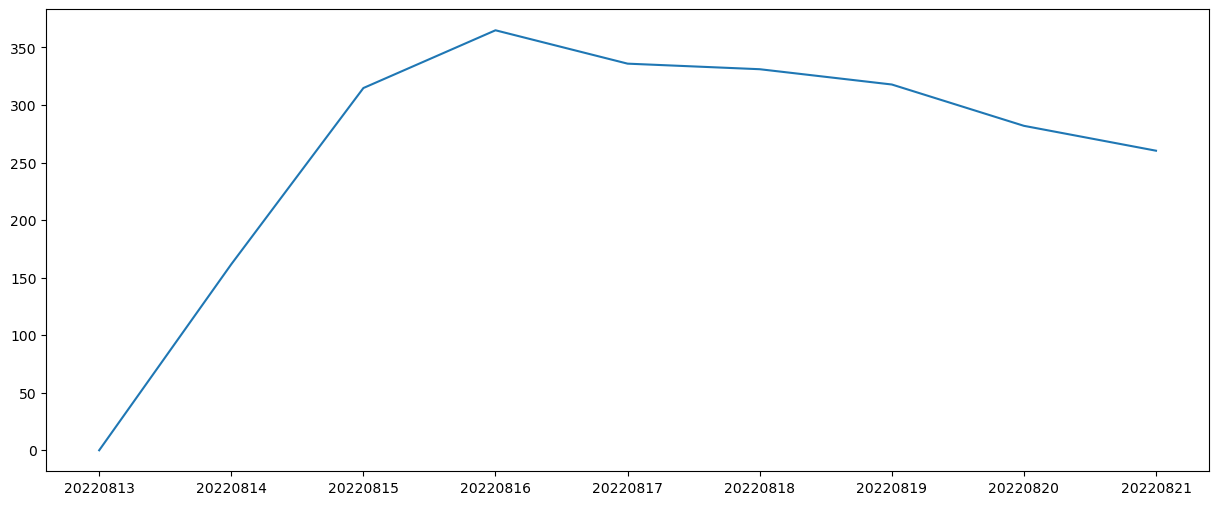

In [18]:
# Select Adset : 
df = group_Adset_Name.get_group("AI_20220813_Toyotacars_Fox_Ford")

# replace "-"
date = df["date"]
df_replace_dash = pd.Series(date).str.replace('-','')

# sort_values 排序
df['date'] = df_replace_dash
day_sort = df.sort_values(by=['date'])
date = day_sort['date']
CPM = df['CPM']

fig = plt.figure(figsize=(15, 6))
font = {'family' : 'normal',
        'size'   : '10'}
plt.rc('font', **font)
plt.plot(date, CPM)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


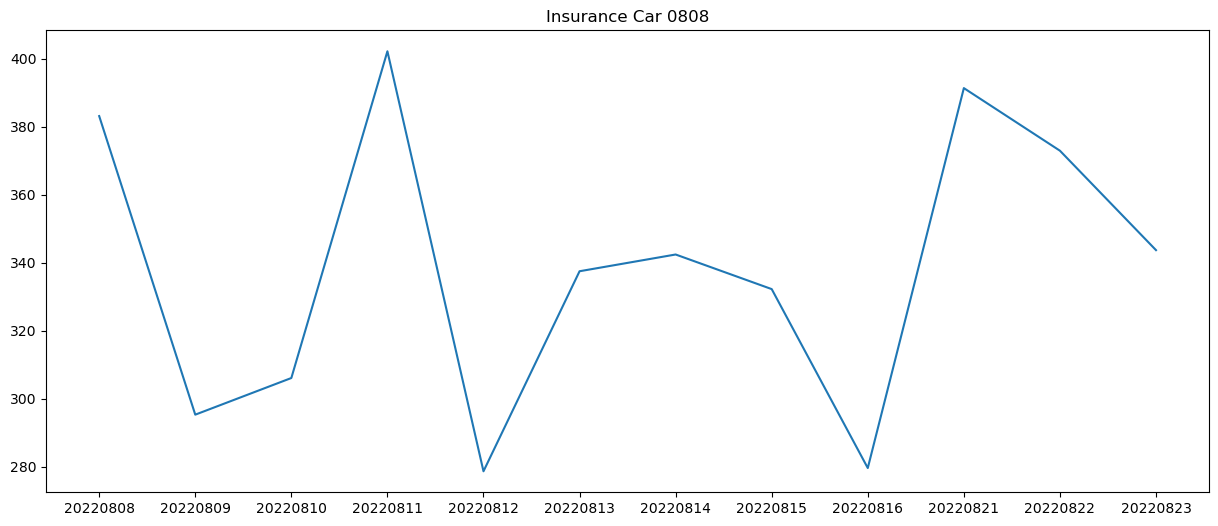

In [19]:
# Select Adset : 
df = group_Adset_Name.get_group("金融保險房車_0808")

# replace "-"
date = df["date"]
df_replace_dash = pd.Series(date).str.replace('-','')

# sort_values 排序
df['date'] = df_replace_dash
day_sort = df.sort_values(by=['date'])
date = day_sort['date']
CPM = df['CPM']

fig = plt.figure(figsize=(15, 6))
font = {'family' : 'normal',
        'size'   : '10'}
plt.rc('font', **font)
plt.title('Insurance Car 0808')
plt.plot(date, CPM)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


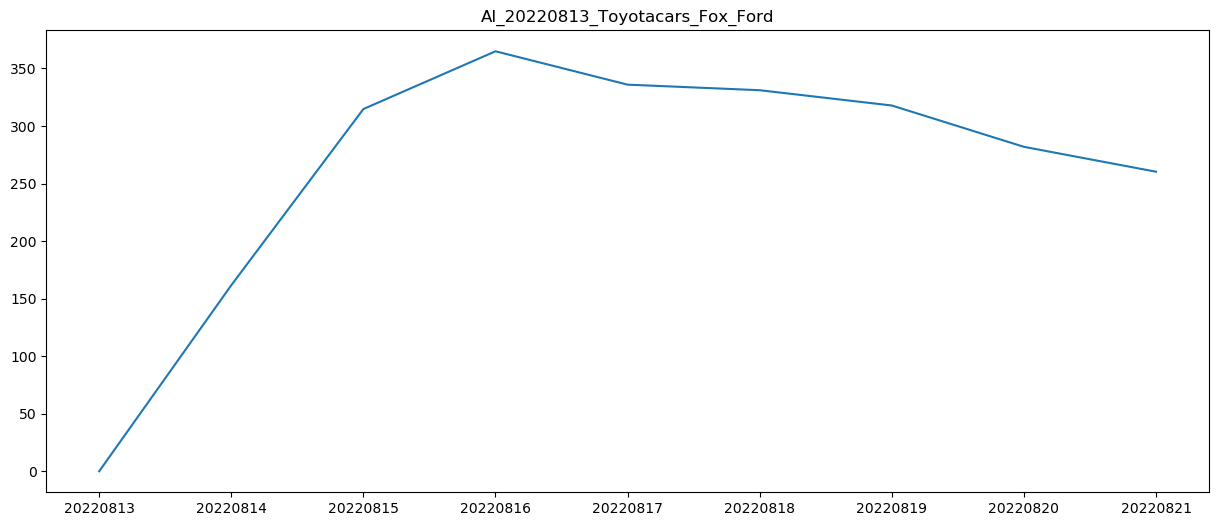

In [20]:
df = group_Adset_Name.get_group("AI_20220813_Toyotacars_Fox_Ford")

# replace "-"
date = df["date"]
df_replace_dash = pd.Series(date).str.replace('-','')

# sort_values 排序
df['date'] = df_replace_dash
day_sort = df.sort_values(by=['date'])
date = day_sort['date']
CPM = df['CPM']

fig = plt.figure(figsize=(15, 6))
font = {'family' : 'normal',
        'size'   : '10'}
plt.rc('font', **font)
plt.title('AI_20220813_Toyotacars_Fox_Ford')
plt.plot(date, CPM)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


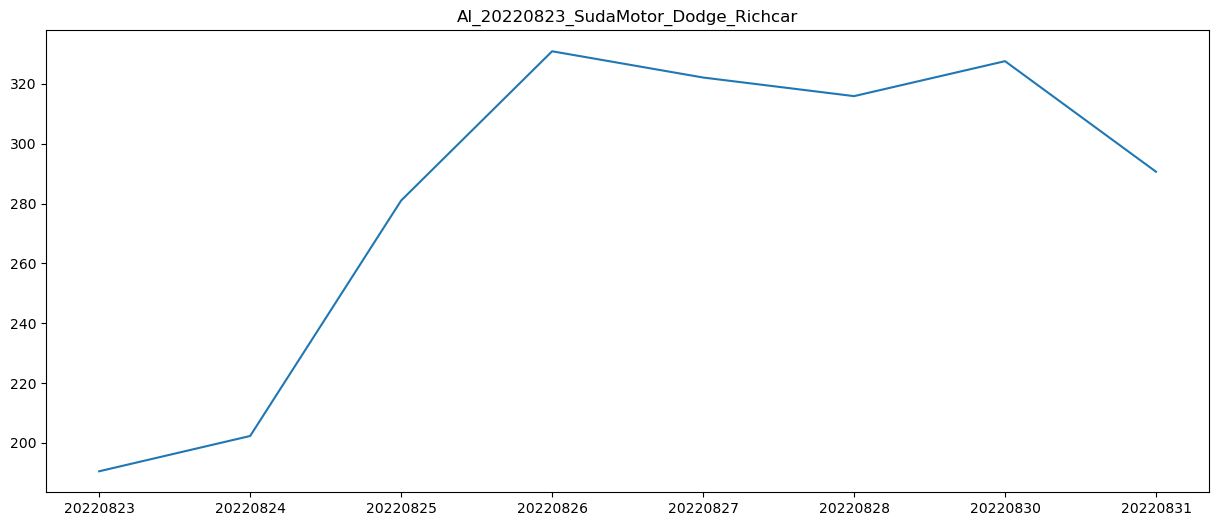

In [21]:
df = group_Adset_Name.get_group("AI_20220823_SudaMotor_Dodge_Richcar")

# replace "-"
date = df["date"]
df_replace_dash = pd.Series(date).str.replace('-','')

# sort_values 排序
df['date'] = df_replace_dash
day_sort = df.sort_values(by=['date'])
date = day_sort['date']
CPM = df['CPM']

fig = plt.figure(figsize=(15, 6))
font = {'family' : 'normal',
        'size'   : '10'}
plt.rc('font', **font)
plt.title('AI_20220823_SudaMotor_Dodge_Richcar')
plt.plot(date, CPM)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


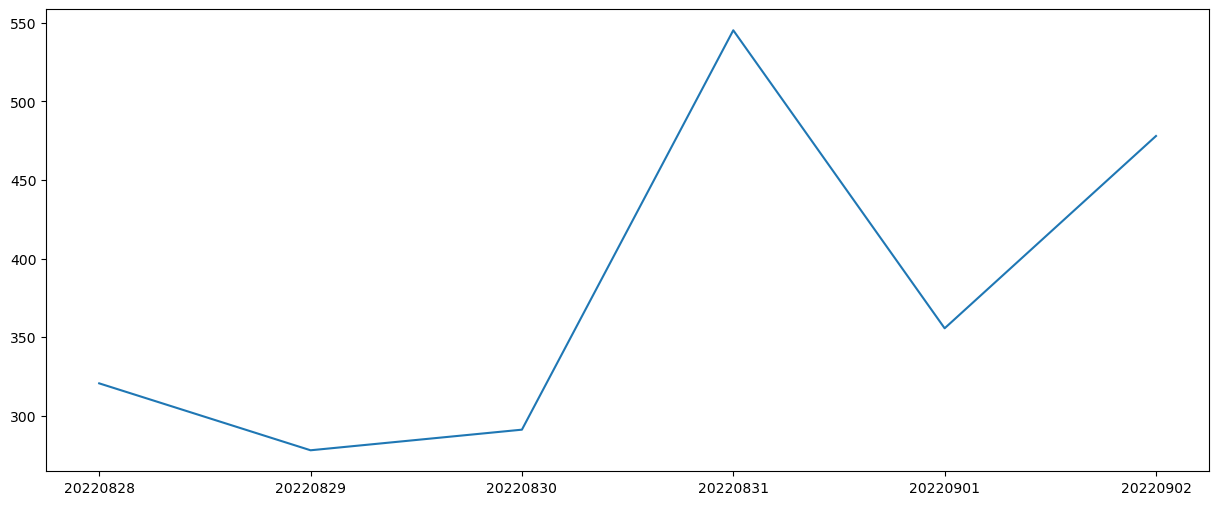

In [22]:
df = group_Adset_Name.get_group("AI_20220828_stadium_science_GaleSportsAssociation")

# replace "-"
date = df["date"]
df_replace_dash = pd.Series(date).str.replace('-','')

# sort_values 排序
df['date'] = df_replace_dash
day_sort = df.sort_values(by=['date'])
date = day_sort['date']
CPM = df['CPM']

fig = plt.figure(figsize=(15, 6))
font = {'family' : 'normal',
        'size'   : '10'}
plt.rc('font', **font)
plt.plot(date, CPM)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


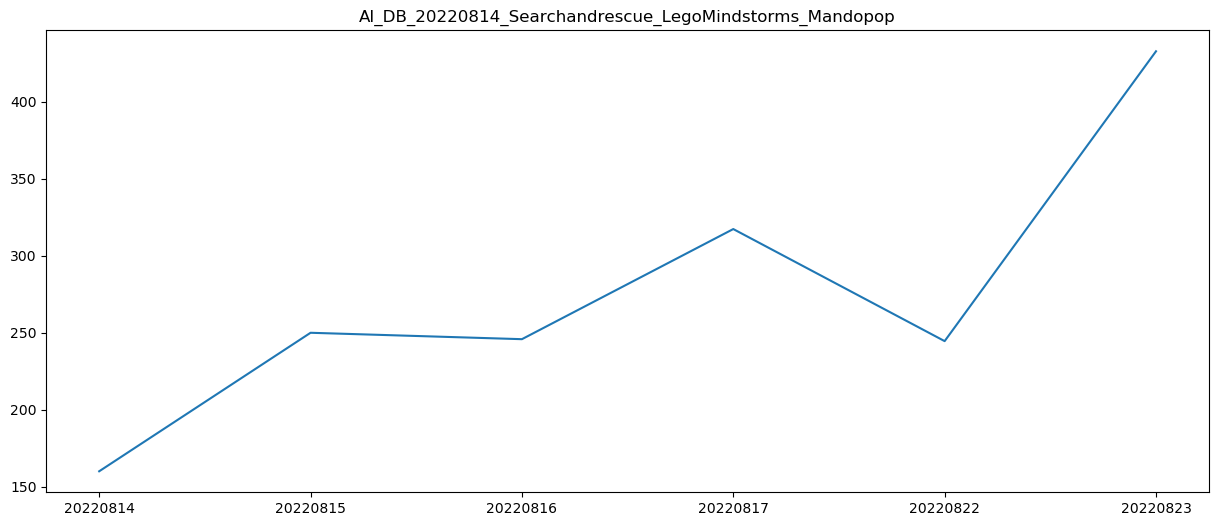

In [23]:
df = group_Adset_Name.get_group("AI_DB_20220814_Searchandrescue_LegoMindstorms_Mandopop")

# replace "-"
date = df["date"]
df_replace_dash = pd.Series(date).str.replace('-','')

# sort_values 排序
df['date'] = df_replace_dash
day_sort = df.sort_values(by=['date'])
date = day_sort['date']
CPM = df['CPM']

fig = plt.figure(figsize=(15, 6))
font = {'family' : 'normal',
        'size'   : '10'}
plt.title('AI_DB_20220814_Searchandrescue_LegoMindstorms_Mandopop')
plt.plot(date, CPM)
plt.show()

### (目前暫不採用)嘗試用log, 四捨五入去處理Interested_Audience Size(IT_Aud_size)數值過大問題

In [2]:
# df_all['sum_of_IT_Aud_Size'] = df_all['sum_of_IT_Aud_Size']/100000000
# df_all['sum_of_IT_Aud_Size'] = df_all['sum_of_IT_Aud_Size'].round(2)*100
# df_all['sum_of_IT_Aud_Size']
# df_all
# sum_of_IT_Aud_Size = df_all.sum_of_IT_Aud_Size
# test = np.sqrt(np.square(df_all).sum(axis=1))

### Correlation : 
- Reference : https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

In [25]:
df_all.corr()

,day_clicks,day_reach,day_spend,day_impression,CPM,max_IT_Aud,max_IT_Aud_norm,CPM_norm
day_clicks,1.000000,0.954497,0.954827,0.950297,0.122499,0.033676,0.033676,0.122499
day_reach,0.954497,1.000000,0.987644,0.997029,0.097718,-0.032538,-0.032538,0.097718
day_spend,0.954827,0.987644,1.000000,0.985362,0.164020,-0.034016,-0.034016,0.164020
day_impression,0.950297,0.997029,0.985362,1.000000,0.084831,-0.041206,-0.041206,0.084831
CPM,0.122499,0.097718,0.164020,0.084831,1.000000,0.259351,0.259351,1.000000
max_IT_Aud,0.033676,-0.032538,-0.034016,-0.041206,0.259351,1.000000,1.000000,0.259351
max_IT_Aud_norm,0.033676,-0.032538,-0.034016,-0.041206,0.259351,1.000000,1.000000,0.259351
CPM_norm,0.122499,0.097718,0.164020,0.084831,1.000000,0.259351,0.259351,1.000000


#### Plot Correlation Skill : 
background_gradient : https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html

In [26]:
df_all.style.background_gradient(axis=0)  

,adsetID_date,Adset_Name,date,day_clicks,day_reach,day_spend,day_impression,CPM,Campaign_Daily_Budget,max_IT_Aud,max_IT_Aud_norm,CPM_norm
250,23852032646620227_2022-08-28,AI_20220823_SudaMotor_Dodge_Richcar,2022-08-28,0.000000,63.000000,12.000000,63.000000,190.476190,3400,34880030,0.024852,0.279125
276,23852021854480227_2022-08-22,AI_20220822_HyundaiMotor_Lotuscar_Jaguarcar,2022-08-22,0.000000,222.000000,60.000000,236.000000,254.237288,3400,64630310,0.051533,0.372562
493,23851947328850227_2022-08-15,AI_20220815_electriccar_Kia_AutomotiveDesign,2022-08-15,0.000000,83.000000,5.000000,87.000000,57.471264,3400,106781360,0.089335,0.084219
555,23851930679280227_2022-08-13,AI_20220813_Toyotacars_Fox_Ford,2022-08-13,0.000000,17.000000,0.000000,17.000000,0.000000,3400,284874330,0.249052,0.000000
622,23851919972150227_2022-08-16,AI_20220812_Shares FiscalandFinance _Automobileindustry_Carchiefmobilization,2022-08-16,0.000000,79.000000,23.000000,83.000000,277.108434,3400,454837290,0.401478,0.406077
680,23851883875320227_2022-08-10,購物時尚_0808,2022-08-10,0.000000,184.000000,73.000000,187.000000,390.374332,3400,1122219840,1.000000,0.572058
710,23851883844500227_2022-08-08,金融保險房車_0808,2022-08-08,0.000000,214.000000,82.000000,214.000000,383.177570,3400,492194130,0.434981,0.561512
711,23851883844500227_2022-08-09,金融保險房車_0808,2022-08-09,0.000000,266.000000,83.000000,281.000000,295.373665,3400,492194130,0.434981,0.432843
742,23851883812620227_2022-08-08,居家生活_0808,2022-08-08,0.000000,117.000000,48.000000,118.000000,406.779661,3400,614046470,0.544260,0.596098
402,23851981481560227_2022-08-20,AI_DB_20220818_MortalKombat 2011videogame _PCgame_FrankSinatra,2022-08-20,1.000000,650.000000,216.000000,695.000000,310.791367,3400,61304340,0.048550,0.455436


### (暫不使用)Numeric Variable/Data